# Raw Data Visualization

This notebook loads in a measurement file block (included IMU and MoCap data)
and makes some plot about the path that the robot took over the measurement 
and also plots the recorded IMU sensor datas as accelero, magneto and gyroscope.

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Load a chosen measurement pack and visualise it.

# === Change THIS Section ====
# Location folder of the measurement files
lock_meas = '..\\..\\DATA\\RAW\\Measure_04\\LongRun'
# Date of the measurement:
meas_date = '2018_ 11_ 27_9_45_58_'        
# === Change Block End =======

file_list = os.listdir(lock_meas)

imu_data = pd.read_csv(lock_meas + '\\' + meas_date + 'IMU.txt',
                               sep='\t',
                               decimal=',',
                               names=['time', 'acc0', 'acc1', 'acc2', 'gyro0', 'gyro1', 'gyro2', 'mag0', 'mag1', 'mag2'])

mocap_data = pd.read_csv(lock_meas + '\\' + meas_date + 'MoCap.txt',
                                 sep='\t',
                                 decimal=',',
                                 names=['time', 'x', 'y', 'z', 'tracked', 'beta', 'Qx', 'Qy', 'Qz', 'Qw'])

# Merge the two data file to synronise them. In both dataset there are some data row that can't be matched, this data will
# be trown away
df = pd.merge(imu_data, mocap_data, on=['time'], how='inner')

In [38]:
print('Number of measurement points: '+str(df.shape[0]))

Number of measurement points: 16116


# The PATH plot

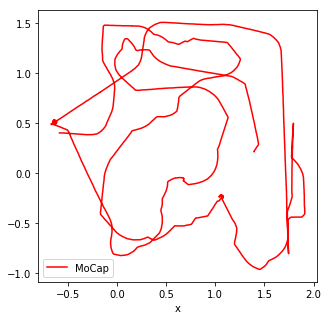

In [32]:
df.plot(x='x', y='z', color='red', figsize=(5,5), label='MoCap')
plt.show()

# MoCap plot

Every optional output for the network. 

    x,y,z       - absolute coordinates of the robot
    Qx,Qy,Qz,Qw - qvaternion representation of the robot orientation
    beta        - single angle orientation representation calculated 
                    from the qvaternion form


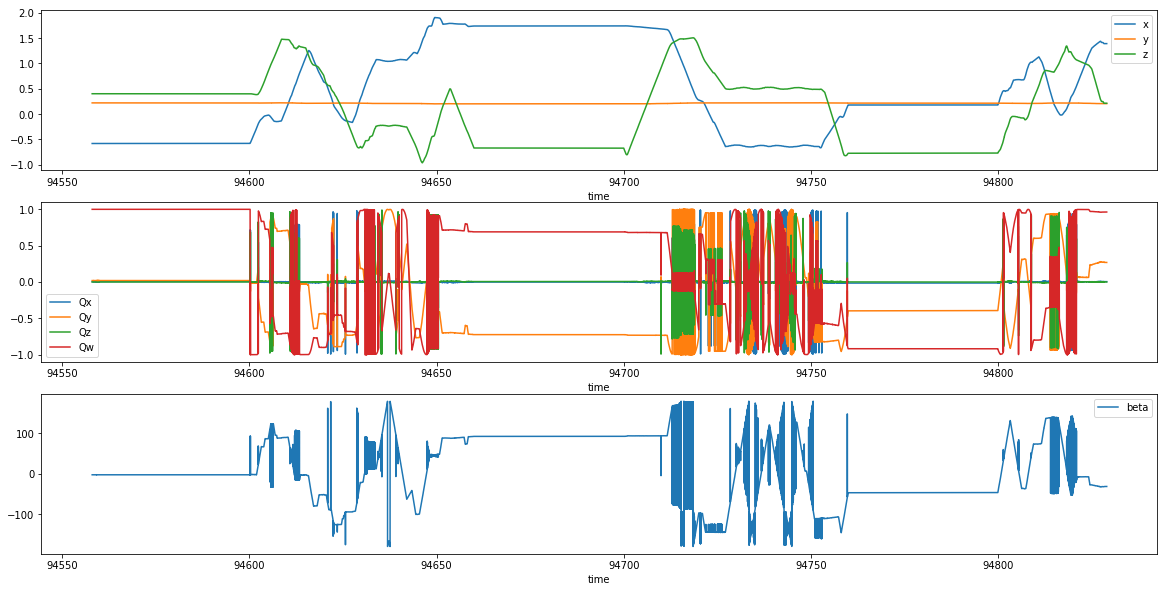

In [35]:
f2, (ax4, ax5, ax6) = plt.subplots(3, 1)
df.plot(x='time', y='x', figsize=(20,10), ax=ax4)
df.plot(x='time', y='y', ax=ax4)
df.plot(x='time', y='z', ax=ax4)
df.plot(x='time', y='Qx', ax=ax5)
df.plot(x='time', y='Qy', ax=ax5)
df.plot(x='time', y='Qz', ax=ax5)
df.plot(x='time', y='Qw', ax=ax5)
df.plot(x='time', y='beta', ax=ax6)
plt.show()

# IMU plot

Every sensor data from the IMU

    acc  - accelerometer (all 3 axis)
    gyro - gyroscope (all 3 axis)
    mag  - magnetometer (all 3 axis)

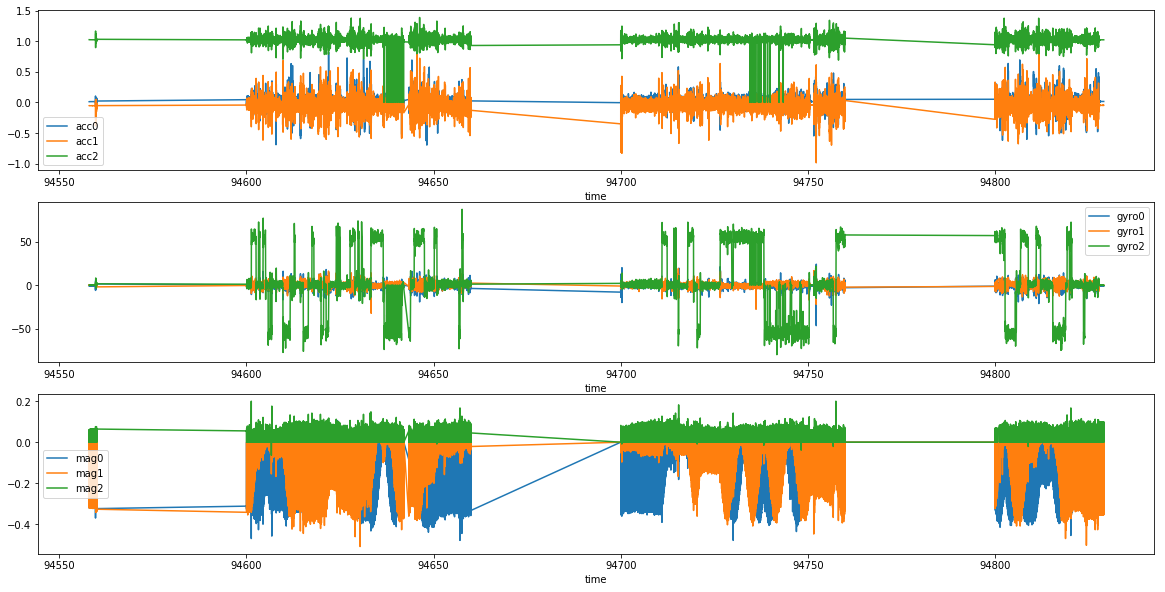

In [36]:
f1, (ax1, ax2, ax3) = plt.subplots(3, 1)
df.plot(x='time', y='acc0', figsize=(20,10), ax=ax1)
df.plot(x='time', y='acc1', ax=ax1)
df.plot(x='time', y='acc2', ax=ax1)
df.plot(x='time', y='gyro0', ax=ax2)
df.plot(x='time', y='gyro1', ax=ax2)
df.plot(x='time', y='gyro2', ax=ax2)
df.plot(x='time', y='mag0', ax=ax3)
df.plot(x='time', y='mag1', ax=ax3)
df.plot(x='time', y='mag2', ax=ax3)
plt.show()